In [1]:
%matplotlib inline

In [2]:
# Import Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

In [3]:
# Get File Path
os.getcwd()

'C:\\Users\\User\\Desktop\\matplotlib-challenge'

In [4]:
# Study data files (Load) 
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

In [5]:
# Read the data & store in DataFrame
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Merge the two CSV files together
mice_data_merged = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID"])
mice_data_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Check the number of mice
mice = mice_data_merged["Mouse ID"].value_counts()
mouse_count = len(mice)
mouse_count

249

In [10]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = mice_data_merged.loc[mice_data_merged.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_mouse_id = mice_data_merged[mice_data_merged.duplicated(["Mouse ID"])]
# duplicate_mouse_id

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_data_merged[mice_data_merged['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame
clean_mice = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

In [13]:
# SUMMARY STATISTICS ____________________________

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [15]:
summary_stats_table = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# BAR & PIE CHARTS _________________________________________

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
treatment_data = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index() 

#Alter the dataframe down to two columns 
treatment_df = treatment_data[["Drug Regimen", "Mouse ID"]] 
treatment_df = treatment_df.set_index("Drug Regimen")

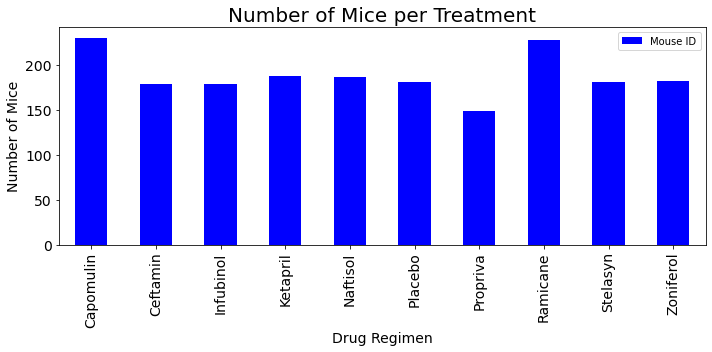

In [19]:
# Create the Bar Chart
treatment_df.plot(kind="bar",figsize=(10,5), color="b",fontsize = 14)              
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.tight_layout()
plt.savefig("PyPies.png")
plt.show()

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_list =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

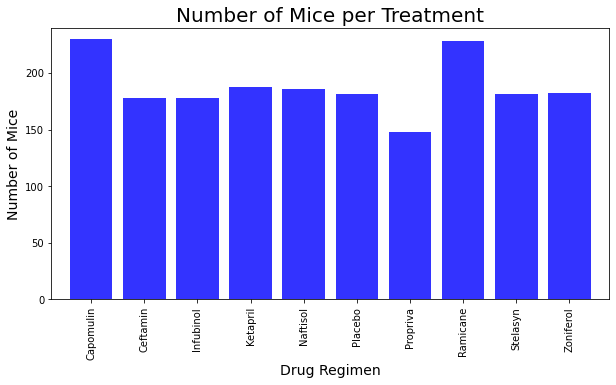

In [21]:
# Create the Bar Chart using pyplot
x_axis = np.arange(len(drug_list))
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(drug_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.savefig("PyPies.png")

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group dataframe by gender and count up male and female mice.
# Use .nunique so we don't count mice more than once.
gender_group = clean_df.groupby(["Sex"])["Mouse ID"].nunique()
gender_group

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

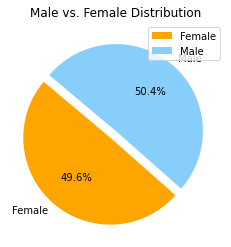

In [23]:
# The colors of each section of the pie chart & the explode
colors = ["orange", "lightskyblue"]
explode = (0.1, 0)
# Create pie chart using pandas.
pandas_pie = gender_group.plot(kind="pie", y="Mouse ID", startangle=140, autopct="%1.1f%%", colors=colors, explode=explode)

# Add labels for axes and add a title for the graph.
pandas_pie.set_title("Male vs. Female Distribution")

# Hide y label
pandas_pie.set_ylabel('')

# Add legend
pandas_pie.legend(loc='best')

# Equal axis
pandas_pie.set_aspect('equal') 

# Show plot
plt.savefig("PyPies.png")
plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert result of groupby to dataframe.
gender_group_df = pd.DataFrame(gender_group)
gender_group_df

,Mouse ID
Sex,
Female,123
Male,125


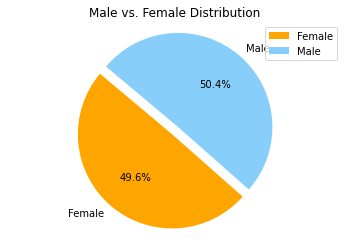

In [25]:
# Labels for the sections of our pie chart.
labels = list(gender_group_df.index.values)

# The values of each section of the pie chart.
sizes = list(gender_group_df.loc[:, "Mouse ID"])

# The colors of each section of the pie chart.
colors = ["orange", "lightskyblue"]

# Explode
explode =  (0.1, 0)

# Automatically finds the percentages of each part of the pie chart.
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, explode=explode)

# Equal axis
plt.axis("equal")

# Add title and legend.
plt.title("Male vs. Female Distribution")
plt.legend(loc="upper right")

# Show plot and save image as figure.
plt.savefig("pie_matplotlib.png")
plt.show()

In [37]:
# Quartiles, Outliers and Boxplots________________________________

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

In [39]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# CAPOMULIN
Capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [40]:
# Capomulin quantiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quantiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quantiles[0.25]
upperq = quantiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quantile of Capomulin tumors: {lowerq}")
print(f"The upper quantile of Capomulin tumors: {upperq}")
print(f"The inner quantile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quantiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quantile of Capomulin tumors: 32.37735684
The upper quantile of Capomulin tumors: 40.1592203
The inner quantile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [41]:
# RAMICANE
Ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [42]:
# Ramicane quantiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quantiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quantiles[0.25]
upperq = quantiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quantile of Ramicane tumors: {lowerq}")
print(f"The upper quantile of Ramicane tumors: {upperq}")
print(f"The inner quantile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quantiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quantile of Ramicane tumors: 31.56046955
The upper quantile of Ramicane tumors: 40.65900627
The inner quantile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [43]:
# INFUBINOL 
Infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [44]:
# Infubinol quantiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quantiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quantiles[0.25]
upperq = quantiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quantile of Infubinol tumors: {lowerq}")
print(f"The upper quantile of Infubinol tumors: {upperq}")
print(f"The inner quantile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quantiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quantile of Infubinol tumors: 54.04860769
The upper quantile of Infubinol tumors: 65.52574285
The inner quantile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [45]:
# CEFTAMIN
Ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [46]:
# Ceftamin quantiles and IQR
# Determine outliers using upper and lower bounds
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quantiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quantiles[0.25]
upperq = quantiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quantile of Ceftamin tumors: {lowerq}")
print(f"The upper quantile of Ceftamin tumors: {upperq}")
print(f"The inner quantile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quantiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quantile of Ceftamin tumors: 48.72207785
The upper quantile of Ceftamin tumors: 64.29983003
The inner quantile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


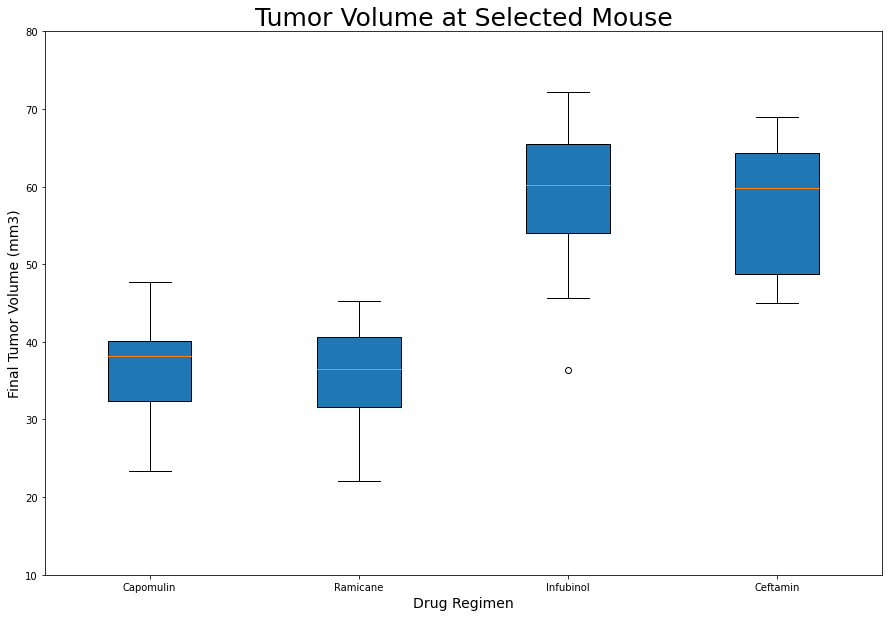

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("box_plot.png", bbox_inches = "tight")

plt.show()